## Install packages

Open up terminal/command prompt and install the following packages:

```
pip install matplotlib numpy pd regex
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

### Import dataset as a Pandas dataframe

In [2]:
file_path = "C:\\Users\\chris\\Downloads\\adult.csv" #change to whatever your file path is
raw_data = pd.read_csv(file_path)

#### Check dataset dimensions and first few rows

In [3]:
print(raw_data.shape)
total_rows = len(raw_data)
raw_data.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Look at dataset variables, check datatypes of each column

In [4]:
print(raw_data.columns)
print(raw_data.dtypes)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


#### Look at possible values for ```income``` and plot counts

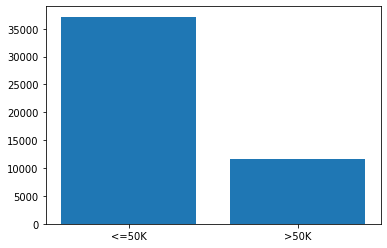

In [5]:
income_unique = raw_data.income.unique()
xpos = range(len(income_unique))
plt.bar(xpos, raw_data.income.value_counts())
plt.xticks(xpos, income_unique)
plt.show()

#### Split data based on ```income``` value

In [6]:
def split_dataset(data, variable):
    out = {}
    for v in data[variable].unique():
        out[v] = data[data[variable] == v]
    return out

In [7]:
spl = split_dataset(raw_data, "income")
rich = spl[">50K"]
poor = spl["<=50K"]

In [8]:
rich1 = raw_data.query('income == ">50K"')
poor1 = raw_data.query('income == "<=50K"')

In [9]:
assert(np.all(rich == rich1) and np.all(poor == poor1))

In [10]:
len(rich)/len(raw_data) #gives proportion of people in dataset making >50k

0.23928176569346055

### Data Visualization

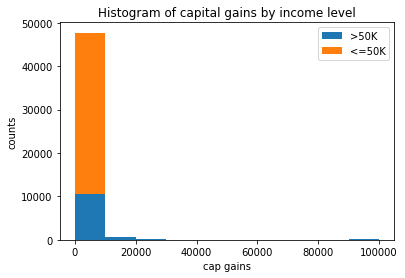

In [11]:
plt.hist([rich["capital-gain"], poor["capital-gain"]], stacked = True, label = [">50K", "<=50K"])
plt.xlabel("cap gains")
plt.ylabel("counts")
plt.title("Histogram of capital gains by income level")
plt.legend()
plt.show()

In [12]:
print(len(raw_data[raw_data["capital-gain"] > 0])/total_rows)
#only ~8% of data points have >0 capital gains, consider dropping

0.08261332459768232


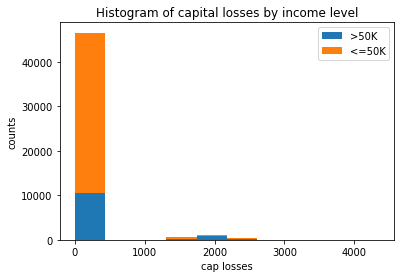

In [13]:
plt.hist([rich["capital-loss"], poor["capital-loss"]], stacked = True, label = [">50K", "<=50K"])
plt.xlabel("cap losses")
plt.ylabel("counts")
plt.title("Histogram of capital losses by income level")
plt.legend()
plt.show()

In [14]:
print(len(raw_data[raw_data["capital-loss"] > 0])/total_rows)
#only ~4% of data points have >0 capital losses, consider dropping

0.046722083452766065


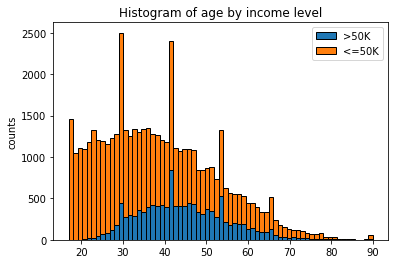

In [15]:
plt.hist([rich["age"], poor["age"]], bins = "auto", stacked = True, label = [">50K", "<=50K"], edgecolor = "black")
plt.ylabel("counts")
plt.title("Histogram of age by income level")
plt.legend()
plt.show()

* Cap gains/losses: since there so few nonzero values for capital gains/losses, most of which are huge outliers, we can consider dropping these variables
* Age: people who make >50K tend to be older than those who make <=50K

#### Define some functions to facilitate visualization of categorical variables

In [16]:
def getCounts(rich, poor, variable):
    
    '''
    gets counts for each value of specified variable. if one dataset doesn't have any instances
    of a value, adds value and sets count to 0
    '''
    
    #get counts of values for specified variable
    rich_vals = rich[variable]
    poor_vals = poor[variable]
    
    rich_counts = rich_vals.value_counts()
    poor_counts = poor_vals.value_counts()
    
        
    #check to see if value[s] present in one count but not the other
    rk = set(rich_counts.keys())
    pk = set(poor_counts.keys())
    
    #if there are differences in values, set value to 0 in other count
    if len(rk) < len(pk): 
        diffs = set(pk).difference(rk)
        for d in diffs:
            rich_counts.at[d] = 0
            rk.add(d)
            
    elif len(rk) > len(pk):
        diffs = set(rk).difference(pk)
        for d in diffs:
            poor_counts.at[d] = 0
            pk.add(d)
    
    #order Series' for consistency when plotting
    rich_counts.sort_index(inplace = True)
    poor_counts.sort_index(inplace = True)
    
    assert(np.all(rich_counts.keys() == poor_counts.keys()))
    
    return (rich_counts, poor_counts)

In [17]:
def createFreqBarChart(rich, poor, variable):
    ''' 
    plots side-by-side bar charts for specified categorical variable, split by income class
    '''
    
    rich_counts, poor_counts = getCounts(rich, poor, variable) 
    vals = rich_counts.keys()
   
    #graph side-by-side bar chart, grouped by variable value and split by income class (>50k, <=50k)
    xpos = np.arange(len(vals))
    width = .35
    plt.bar(xpos, rich_counts, width, label = ">50K")
    plt.bar(xpos + width, poor_counts, width, label = "<=50K")
    plt.xticks(xpos+width/2, rich_counts.keys(), rotation = 90)
    plt.xlabel(variable)
    plt.ylabel("Counts")
    plt.legend(loc = "best")
    plt.show()
            


In [18]:
def convert_percent(rich, poor, variable):
    '''
    converts counts of values for specified variable to percentages
    '''
    
    rich_counts, poor_counts = getCounts(rich, poor, variable)
    
    vals = rich_counts.keys()
        
    rich_prop = []
    poor_prop = []
    
    for v in vals:
        total = rich_counts[v] + poor_counts[v]
        
        rich_prop.append(rich_counts[v]/total)
        poor_prop.append(poor_counts[v]/total)
        
    
    return(pd.Series(rich_prop, index = vals), pd.Series(poor_prop, index = vals))

In [19]:
def createPropBarChart(rich, poor, variable):
    rich_prop, poor_prop = convert_percent(rich, poor, variable)
    width = .85
    xpos = np.arange(len(rich_prop.keys()))
    
    
    plt.bar(xpos, rich_prop, width, label = ">50K")
    plt.bar(xpos, poor_prop, width, label = "<=50K", bottom = rich_prop)
    plt.xticks(xpos, rich_prop.keys(), rotation = 90)
    plt.xlabel(variable)
    plt.ylabel("Proportion")
    plt.legend(loc = "best")
    plt.show()   

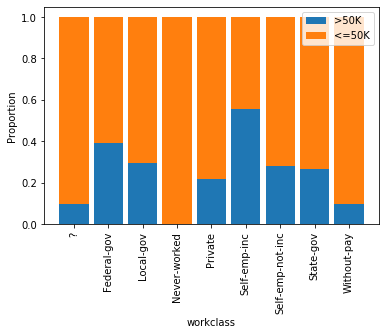

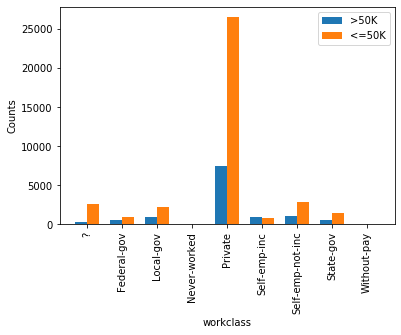

In [20]:
createPropBarChart(rich, poor, "workclass")
createFreqBarChart(rich, poor, "workclass")

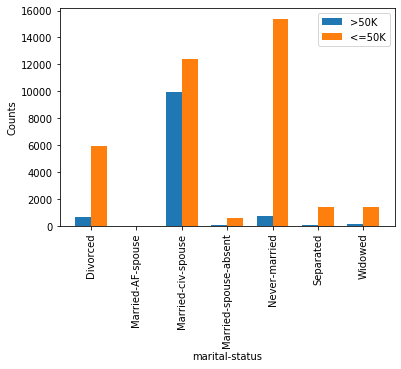

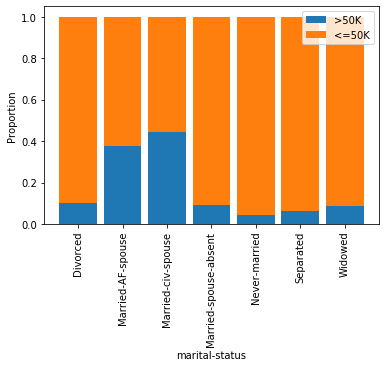

In [21]:
createFreqBarChart(rich, poor, "marital-status")
createPropBarChart(rich, poor, "marital-status")

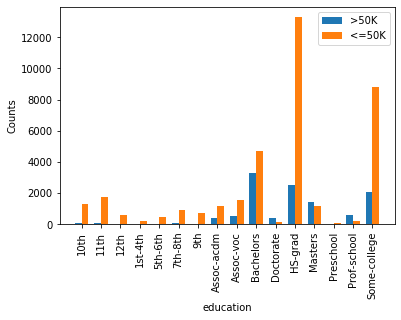

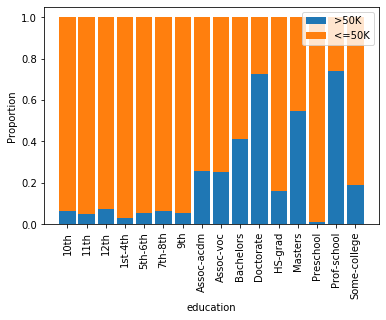

In [22]:
createFreqBarChart(rich, poor, "education")
createPropBarChart(rich, poor, "education")

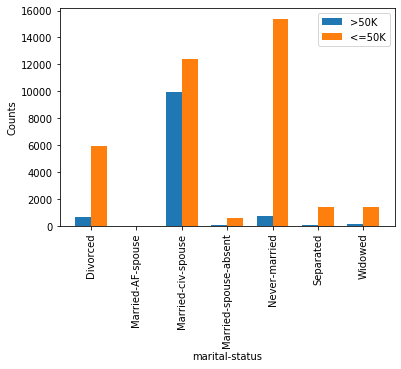

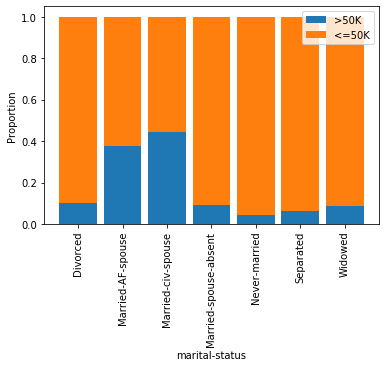

In [23]:
createFreqBarChart(rich, poor, "marital-status")
createPropBarChart(rich, poor, "marital-status")

* lots of values for education variable
* can group together into larger groups so easier to work with

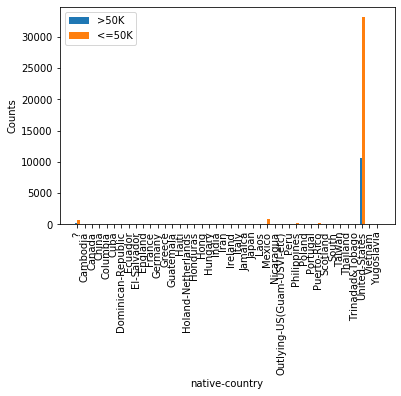

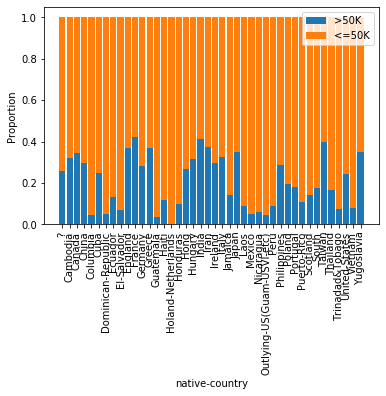

In [24]:
createFreqBarChart(rich, poor, "native-country")
createPropBarChart(rich, poor, "native-country")

In [25]:
us = raw_data[raw_data["native-country"] == "United-States"]
print(len(us)/total_rows)

0.8974243478973015


* ~89% of data points are from US
* Way too many countries represented here -- very few people from most countries
* Can either group into US vs non-US, or can filter data and drop people who aren't from US


### Option 1: Group into US and nonUS

In [26]:
us = set()
us.add("United-States")
nonUS = set(raw_data['native-country'].unique()).difference(us)
data_cgrp = raw_data.replace(to_replace = list(nonUS), value = "nonUS")

In [27]:
data_cgrp['native-country'].unique() #wow it works!

array(['United-States', 'nonUS'], dtype=object)

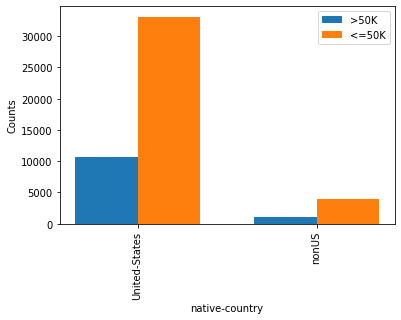

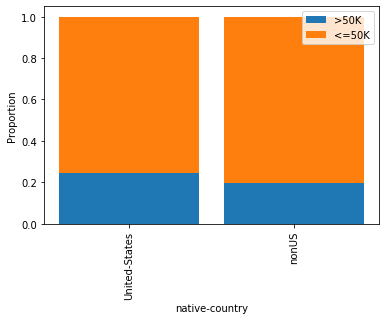

In [28]:
spl_grp = split_dataset(data_cgrp, "income")
rich_cgrp = spl_grp[">50K"]
poor_cgrp = spl_grp["<=50K"]


createFreqBarChart(rich_cgrp, poor_cgrp, "native-country")
createPropBarChart(rich_cgrp, poor_cgrp, "native-country")

### Option 2: Filter out nonUS

In [29]:
data_us = raw_data[raw_data["native-country"] == "United-States"]

In [30]:
data_us["native-country"].unique()

array(['United-States'], dtype=object)

### Feature Engineering

In [31]:
raw_data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Suppose we want to predict whether or not an individual makes over $50K. (Note that only about 24% of people make over 50k).
What are some ideas of things that might help us with this prediction problem?

In [32]:
raw_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


We see that a lot of our data is categorical, so we might have to make use of (One-Hot) Encoding. One way to deal with this is to make use of the pandas function, "get_dummies()", which turns a categorical variable into a set of indicator variables, where each class of the categorical variable becomes a separate indicator variable.

In [33]:
pd.get_dummies(raw_data.education).head(10)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Notice that there are a lot of variables produced as a result of this. However, a lot of these are redundant.. it's probably unlikely that there's a significant difference in income between 10th grade and 11th grade as education.

In [34]:
education_grouped = list()
for person_ed in raw_data.education:
    if (bool(re.search(r'\d', person_ed))) or person_ed == 'Preschool':
        education_grouped.append('some_hs')
    elif 'Assoc' in person_ed:
        education_grouped.append('Associates')
    else:
        education_grouped.append(person_ed)
raw_data['education_grouped'] = education_grouped

In [35]:
print(raw_data.head())
(pd.get_dummies(raw_data.education_grouped).head(10))

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

,Associates,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college,some_hs
0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1


Now we have this feature, "education_grouped," with reasonable categories for a user that we can either pass into a *factor model*, or we can turn into binary indicators.

What else might be useful in predicting income? Maybe the number of hours worked per week. We see that this is a numeric variable. What kind of values do we have?

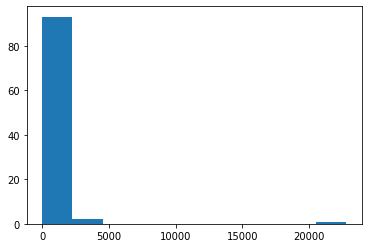

40    22803
50     4246
45     2717
60     2177
35     1937
Name: hours-per-week, dtype: int64


In [36]:
plt.hist(raw_data["hours-per-week"].value_counts())
plt.show()
print(raw_data["hours-per-week"].value_counts().head())

In [37]:
print(raw_data["hours-per-week"].min(), raw_data["hours-per-week"].max())

1 99


We see that there is a very wide variety in the types of hours that people work, although most people seem to work a typical 40 hour week. Well, so far, we have a factor (which gets converted into a bunch of indicator variables), and now we have a numeric variable. Our indicators can either be 0/1, whereas hours/week ranges anywhere from 1 to 99. We can't just feed this into a model, because the scales are so different, so hours-per-week would get weighted much more heavily by the loss function.

In [38]:
def minmax_normalization(arr):
    """
    Perform a min-max normalization of numeric values on an arr.
    arr: array-like list of numeric values
    """
    #We don't need to use loops with numpy arrays, because operations are vectorized
    return (arr - arr.min())/(arr.max() - arr.min())

0    0.397959
1    0.500000
2    0.397959
3    0.397959
4    0.295918
Name: hours-per-week, dtype: float64


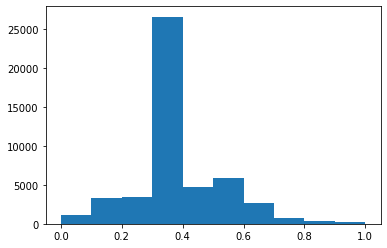

In [39]:
hpw_norm = minmax_normalization(raw_data["hours-per-week"])
print(hpw_norm.head())
plt.hist(hpw_norm)
plt.show()

Now, we see that all of our values are between 0 - 1. They are now all a ratio relative to the minimum and maximum values within our dataset. (If we have a set of data where the minimum value was zero, this does the same thing as dividing each value by the maximum value. In this situation, the math works out to rescaling values to be a proportion of 1).

In [40]:
raw_data["normalized_hours"] = minmax_normalization(raw_data["hours-per-week"])

In [44]:
raw_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_grouped,normalized_hours
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,some_hs,0.397959
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,HS-grad,0.500000
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Associates,0.397959
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Some-college,0.397959
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,Some-college,0.295918


Intuitively, we might think that hours worked per week might be predictive of income. Let's check whether or not they are actually correlated.

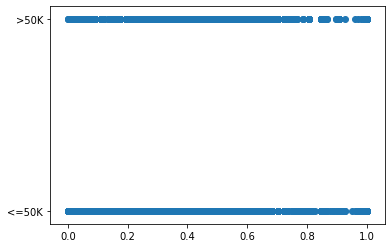

In [42]:
plt.scatter(raw_data.normalized_hours, raw_data.income)
plt.show()

What's wrong with this?

Why can't we check if things are correlated to the output variable?

...


Instead, after fitting a model like a Logistic Regression, we can check the p-values and see if the variables are significant.
More about model building next week.

**Hypothetical Question**

Suppose, instead of a census dataset, we had a person's time spent at work and capital gain/loss for each week.

What are some examples of features we might want to create to predict income then?

### Handing Missing Values:

In [43]:
for col in data_us.columns:
    cts = data_us[col].value_counts()
    if "?" in cts.keys():
        print(f"Missing values in {col}: {cts['?']} values missing")

Missing values in workclass: 2530 values missing
Missing values in occupation: 2540 values missing
